# 분석 2주차 과제

### 1. train data set을 DataFrame으로 불러온 후, 기존 피쳐가 아닌 새로운 feature를 2개 이상 만들어주세요.
### (1주차 과제로 만들었던 feature를 사용하셔도 무관합니다.)
왜 그러한 Feature를 만들었는지 이유도 작성해주세요!

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


#### 변수 설명_ kaggle 참조
- id : Unique ID for each home sold
- date : Date of the home sale
- price : Price of each home sold
- bedrooms : Number of bedrooms
- bathrooms : Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living : Square footage of the apartments interior living space
- sqft_lot : Square footage of the land space
- floors : Number of floors
- waterfront : A dummy variable for whether the apartment was overlooking the waterfront or not
- view : An index from 0 to 4 of how good the view of the property was
- condition : An index from 1 to 5 on the condition of the apartment,
- grade : An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an - average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above : The square footage of the interior housing space that is above ground level
- sqft_basement : The square footage of the interior housing space that is below ground level
- yr_built : The year the house was initially built
- yr_renovated : The year of the house’s last renovation
- zipcode : What zipcode area the house is in
- lat : Lattitude
- long : Longitude
- sqft_living15 : Square footage of the apartments interior living space in 2015
- sqft_lot15 : Square footage of the land space in 2015

In [3]:
# 방 전체 갯수
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
# 평당 가격
df['per_price'] = df['price'] / df['sqft_living']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,per_price
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,4.00,188.050847
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,3.00,233.766234
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,5.00,303.571429
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,5.25,150.145773
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,4.50,275.330189


In [4]:
#회귀 모델을 돌리기 전에 인코딩을 해주셔야 합니다!
df = pd.get_dummies(df)


### 2. Feature Engineering 이후의 df에 대하여 regression 모델을 적용하여(LinearRegression, Ridge, Lasso) train하고, prediction 하여 rmse값을 비교하세요.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
label = df['price']
feature = df.drop('price',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=129)

In [7]:
# LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)
print('LinearRegression rmse : ', mean_squared_error(y_test, y_pred))

LinearRegression rmse :  17069800636.50039


In [8]:
#Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Ridge rmse : ', mean_squared_error(y_test, y_pred))

Ridge rmse :  17034221001.939558


In [9]:
#Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Lasso rmse : ', mean_squared_error(y_test, y_pred))

Lasso rmse :  17050042903.755249


C:\Users\KimMinyoung\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90144640163644.53, tolerance: 163733150102.0043
  positive)


결과를 비교해주세요!

RMSE 크기 : Ridge < Lasso < LinearRegression

### 3. price의 분포도가 왜곡되어 있습니다. 정규화를 한 후 선형모델을 이용하여 rmse 값의 변화를 확인하세요. 

왜곡된 분포에 대하여 정규화해야하는 이유도 설명해주세요.

큰 오차 값으로 인해 가중치 값이 급격히 변하여 학습 과정이 불안정해질 수 있기 때문.

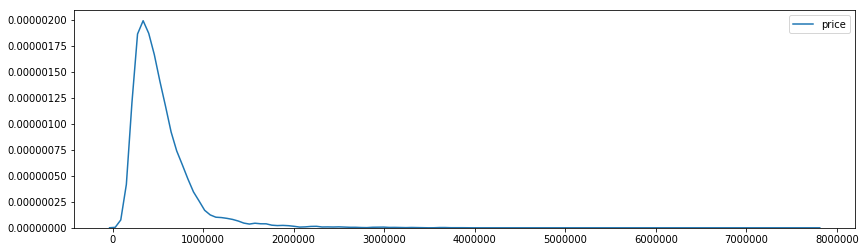

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (14,4)
sns.kdeplot(df['price'])
plt.show()

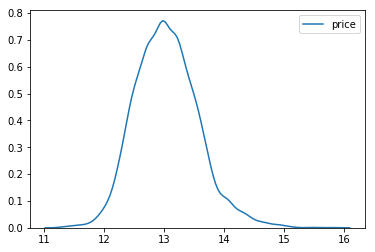

In [11]:
#정규화 하세요
df['price'] = np.log1p(df['price'])
sns.kdeplot(df['price'])
plt.show()

In [12]:
label = df['price']
feature = df.drop('price',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=129)

In [13]:
# 원하는 회귀모델을 사용하세요
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('rmse ', mean_squared_error(y_test, y_pred))

rmse  0.018566696511328477


### 4. 빈칸을 채우고 iris_df 데이터셋과 iris_df_scaled 데이터셋의 차이를 말해주세요.


MinMaxScaler를 쓰기 전 후 비교, 왜 쓰는지(장점), MinMaxScaler의 단점 등에 대해 말해주세요.

In [14]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler= MinMaxScaler()

#MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


- 비교 : MinMaxScaler를 쓴 이후 0~1 range로 조정
- 장점(왜쓰는지) : 범위를 맞춰주어 column별 비율 동등하게 조정
- 단점 : outlier의 경우 반영 어려움

### 5. 3개의 그래프 중에서 무엇이 언더피팅, 오버피팅인지 설명해주세요.


* 그래프를 보고 무엇이 언더피팅, 오버피팅인지 설명하기
* 언더피팅 해결법 1가지와 오버피팅 해결법 3가지 이상 설명하기

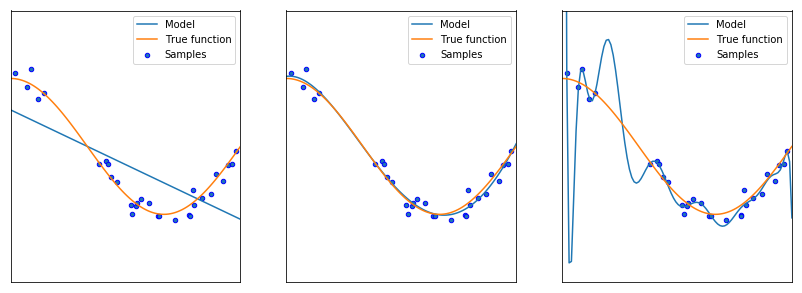

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
plt.show()

### underfitting : 1번 그래프
해결방법)
1. feature를 더 추가한다.

### overfitting : 3번 그래프
해결방법)
1. feature를 줄인다. 
2. 교차검증
3. 정규화

# 수고하셨습니다:)